In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%pylab inline
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (10,6)})
% matplotlib inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [6]:
df.info() #So there are still about 16,800 good data points. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20060 entries, 0 to 20059
Data columns (total 15 columns):
Unnamed: 0                            20060 non-null int64
Facility Size (sq Ft)                 19602 non-null float64
Revenue (US Dollars, million)         17217 non-null float64
Net Income (US Dollars, million)      17217 non-null float64
Total Employees                       17249 non-null float64
Total Assets (US Dollars, million)    17217 non-null float64
Owns Rents_Owns                       20060 non-null int64
Importer                              20060 non-null int64
Exporter                              20060 non-null int64
Manufacturing                         20060 non-null int64
Women Owned                           20060 non-null int64
Minority Owned                        20060 non-null int64
RevPerEm                              16856 non-null float64
RevPerSq                              16821 non-null float64
SqPerEm                               16844 non-nul

In [34]:
#splitting into features and target
y = df['Exporter']
X1 = df[['Facility Size (sq Ft)', 'Revenue (US Dollars, million)', 'Total Employees']]
X2 = df[['RevPerEm', 'RevPerSq','SqPerEm']]
X3 = df[['Importer', 'Manufacturing','Women Owned', 'Minority Owned', 'Owns Rents_Owns']]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000120A55F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AEC2518>]], dtype=object)

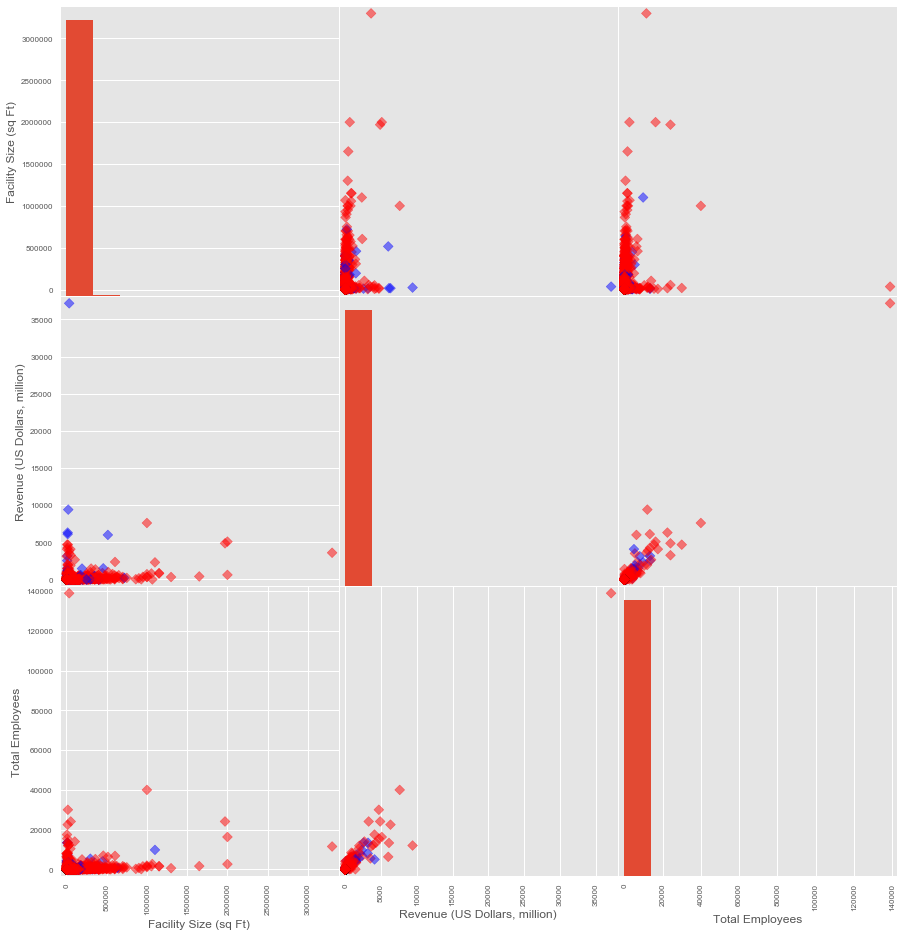

In [30]:
colors = ['red', 'blue'] 
pd.scatter_matrix(X1, c=y.apply(lambda x:colors[x]), figsize = [15,16], marker = 'D')

There do appear to be some clusters for exporters, but they are often mixed in with the non-exporters. So no one of these features alone is likely to distinguish between exporters and non-exporters.

In [36]:
export_yes = df[df['Exporter'] == 1] #Splitting the dataframe to do inferential statistics
export_no = df[df['Exporter'] == 0]


In [42]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [55]:
def InfStats(feature, dataframe1, dataframe2):
    """Compute various statistics such as mean, t-test, and Cohen's d
    feature: column name in dataframe to be compared
    dataframe1 and 2: dataframes split on a different feature
    
    stats from scipy must be loaded, CohenEffectSize must be defined
    
    returns: none; prints results"""
    m1 = mean(dataframe1[feature])
    m2 = mean(dataframe2[feature])
    print('Mean of ' + str(feature) + ' in ' + 'export_yes ' + 'is: ' + str(m1))
    print('Mean of ' + str(feature) + ' in ' + 'export_no ' + 'is: ' + str(m2))
    print('This is a difference of ' + str(abs(m1-m2)))
    s,p = stats.ttest_ind(dataframe1[feature].dropna(),dataframe2[feature].dropna())
    if p <= .05:
        print('This difference is statistically significant with a p-value of ' + str(p))
    else:
        print('This difference is not statistically significant. p-value = ' + str(p))
    
    d = CohenEffectSize(dataframe1[feature].dropna(), dataframe2[feature].dropna())
    print('The Cohens-d is: ' + str(d))
    return None
    

In [56]:
InfStats('RevPerEm', export_yes, export_no)

Mean of RevPerEm in export_yes is: 0.23695571364936197
Mean of RevPerEm in export_no is: 0.12459143373687617
This is a difference of 0.11236427991248579
This difference is statistically significant with a p-value of 2.22078575917e-10
The Cohens-d is: 0.192030473496


In [57]:
InfStats('RevPerSq', export_yes, export_no)

Mean of RevPerSq in export_yes is: 0.006797815400514579
Mean of RevPerSq in export_no is: 0.0007655308280270267
This is a difference of 0.006032284572487553
This difference is statistically significant with a p-value of 8.23839860159e-14
The Cohens-d is: 0.226832604227


In [58]:
InfStats('SqPerEm', export_yes, export_no)

Mean of SqPerEm in export_yes is: 1035.0930489059326
Mean of SqPerEm in export_no is: 1346.549110302651
This is a difference of 311.45606139671827
This difference is statistically significant with a p-value of 0.0157565619076
The Cohens-d is: -0.0722782200792


In looking at a few possible measures of productivity, (Revenue per Employee, Revenue per Sq.Ft., and Sq.Ft. per Employee) it is appears that both the revenue measures have statistically significant differences in their means with small to medium effect size. These may be good measures to include in our model. However, while the sq. footage per employee was statistically significant, it had a minimal effect size indicating that it is not a strong difference. 

In [59]:
# Table of exporters vs importers
export_import = pd.crosstab(index=df["Exporter"], 
                            columns=df["Importer"],
                             margins=True)   # Include row and column totals

export_import.columns = ["Not Importer","Is Importer","rowtotal"]
export_import.index= ["Not Exporter","Is Exporter","coltotal"]

export_import

,Not Importer,Is Importer,rowtotal
Not Exporter,17801,1047,18848
Is Exporter,566,646,1212
coltotal,18367,1693,20060


Note that the proportion of importers that are exporters, too is much higher than for importers that are not exporters. This may be a good feature to include in the model.

In [61]:
# Table of exporters vs women owners
export_women = pd.crosstab(index=df["Exporter"], 
                            columns=df["Women Owned"],
                             margins=True)   # Include row and column totals

export_women.columns = ["Not Woman","Is Woman","rowtotal"]
export_women.index= ["Not Exporter","Is Exporter","coltotal"]

export_women

,Not Woman,Is Woman,rowtotal
Not Exporter,17314,1534,18848
Is Exporter,1111,101,1212
coltotal,18425,1635,20060


The ratio here is very similar (.09 to .088), so this is likely not a good feature. Not too surprising when you think about it.

In [62]:
# Table of exporters vs minority owners
export_Minority = pd.crosstab(index=df["Exporter"], 
                            columns=df["Minority Owned"],
                             margins=True)   # Include row and column totals

export_Minority.columns = ["Not Minority","Is Minority","rowtotal"]
export_Minority.index= ["Not Exporter","Is Exporter","coltotal"]

export_Minority

,Not Minority,Is Minority,rowtotal
Not Exporter,18467,381,18848
Is Exporter,1190,22,1212
coltotal,19657,403,20060


Again, little to see here.

In [63]:
# Table of exporters vs rent or own
export_RO = pd.crosstab(index=df["Exporter"], 
                            columns=df["Owns Rents_Owns"],
                             margins=True)   # Include row and column totals

export_RO.columns = ["Rents","Owns","rowtotal"]
export_RO.index= ["Not Exporter","Is Exporter","coltotal"]

export_RO

,Rents,Owns,rowtotal
Not Exporter,15286,3562,18848
Is Exporter,694,518,1212
coltotal,15980,4080,20060


Much more likely to export if you own your facility.

In [64]:
# Table of exporters vs manufacturing
export_Manufacture = pd.crosstab(index=df["Exporter"], 
                            columns=df["Manufacturing"],
                             margins=True)   # Include row and column totals

export_Manufacture.columns = ["Not Manufacture","Is Manufacture","rowtotal"]
export_Manufacture.index= ["Not Exporter","Is Exporter","coltotal"]

export_Manufacture

,Not Manufacture,Is Manufacture,rowtotal
Not Exporter,4705,14143,18848
Is Exporter,133,1079,1212
coltotal,4838,15222,20060


While there are many more manufacturers than not (3x), exporters are 8x more likely to be manufacturers. This may be a good feature.

### Counclusion

There is a meaninful difference between Revenue per Employee and Revenue per Sq Ft of facility. These are likely good quantitative features to include.

The frequencies are unusual in Own vs Rent, Manufacturing, and Importers. These are likely good catagorical features to include.